In [1]:
# Data processing
import pandas as pd, numpy as np

#Data Visualization
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
!pwd

/Users/kemalmao/crop_recommender_ML/notebook


In [4]:
data = pd.read_csv('/Users/kemalmao/crop_recommender_ML//dataset/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data['label'].unique()

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


In [4]:
data.label.unique()

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

<Axes: xlabel='label', ylabel='Count'>

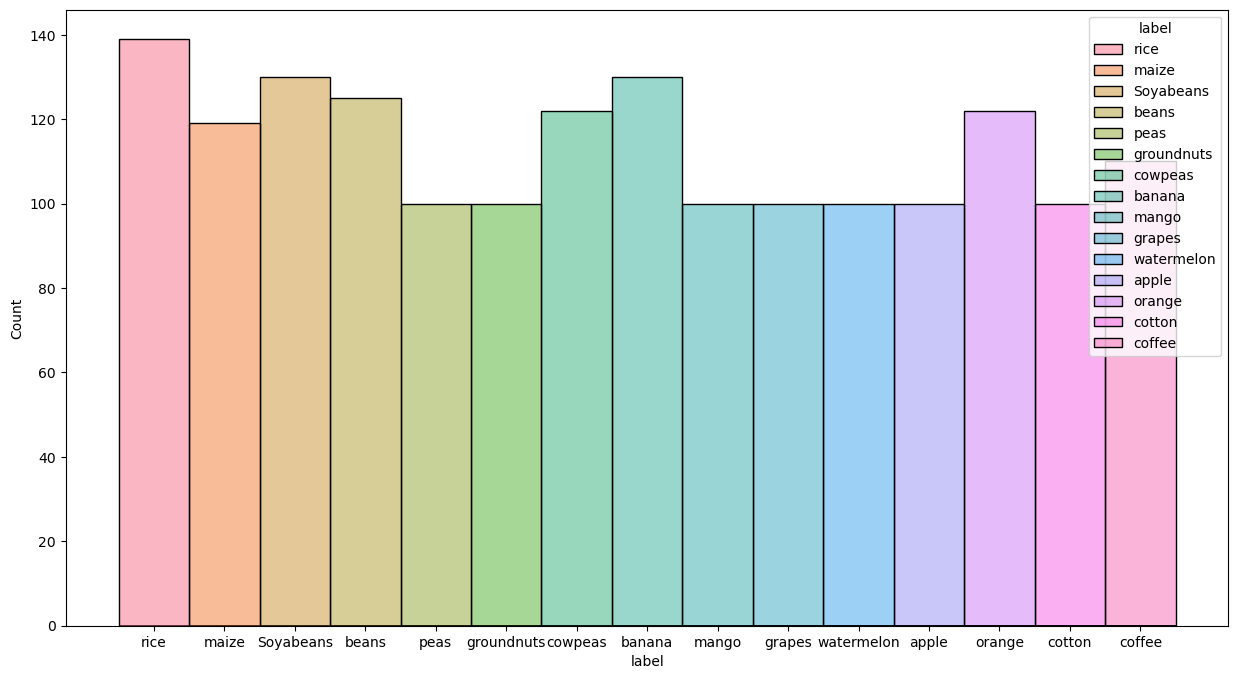

In [5]:
plt.figure(figsize=(15,8))
sns.histplot(data, x='label', bins=15, hue='label')

/tmp/nix-shell.3gCIzy/ipykernel_2058/2613498236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr(method='pearson')


<Axes: >

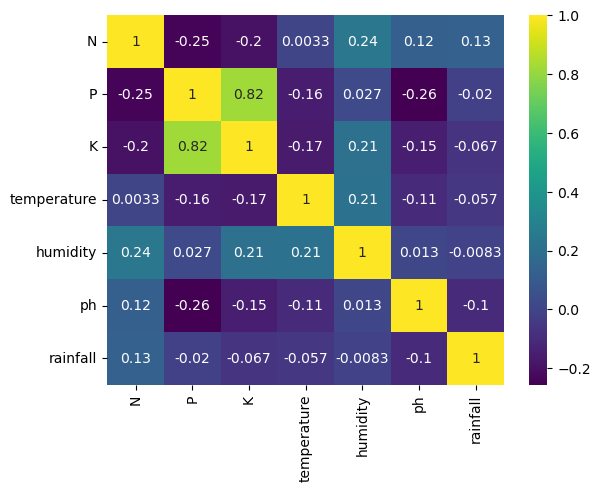

In [6]:
correlation = data.corr(method='pearson')
sns.heatmap(correlation, cmap='viridis', annot=True)

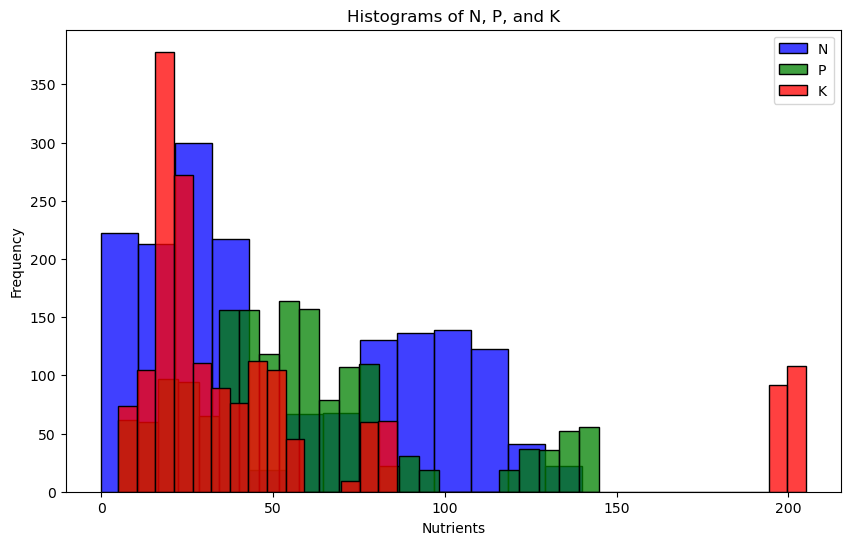

In [7]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(data=data, x='N', color='b', label='N')
sns.histplot(data=data, x='P', color='g', label='P')
sns.histplot(data=data, x='K', color='r', label='K')
plt.xlabel('Nutrients')
plt.ylabel('Frequency')
plt.title('Histograms of N, P, and K')
plt.legend()



<Axes: xlabel='temperature', ylabel='Count'>

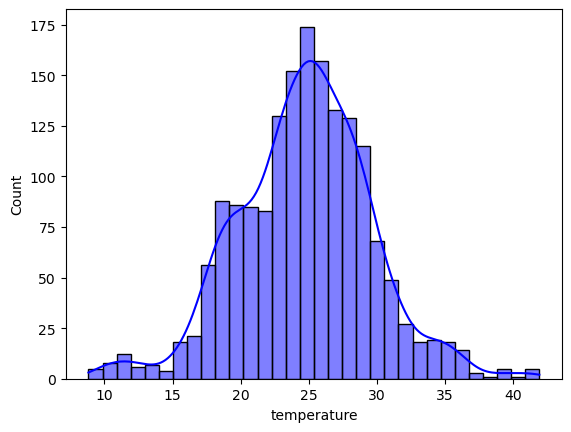

In [8]:
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data=data, x='temperature', color='b', kde=True)
# sns.histplot(data=data, x='temperature', color='b', label='N')
# sns.histplot(data=data, x='humidity', color='g', label='P')
# sns.histplot(data=data, x='ph', color='r', label='K')
# sns.histplot(data=data, x='rainfall', color='y', label='K')

<Axes: xlabel='humidity', ylabel='Count'>

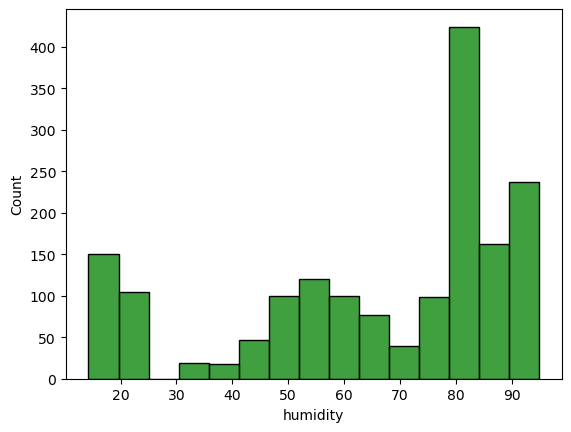

In [9]:
sns.histplot(data=data, x='humidity', color='g')

<Axes: xlabel='ph', ylabel='Count'>

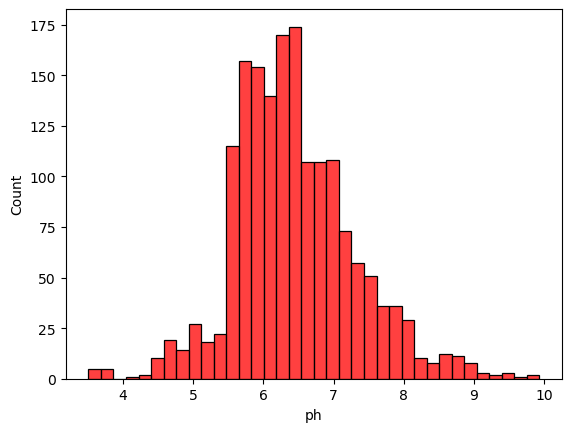

In [10]:
sns.histplot(data=data, x='ph', color='r')

<Axes: xlabel='rainfall', ylabel='Count'>

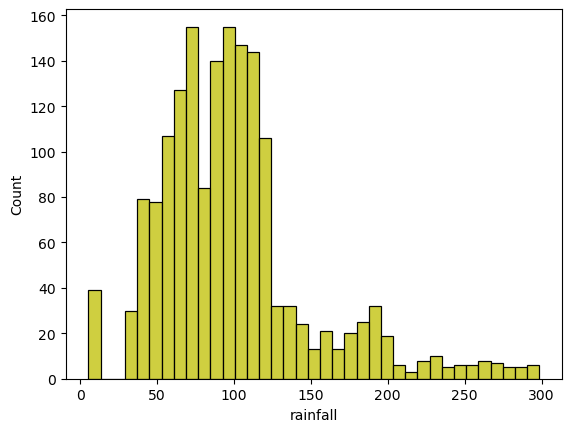

In [11]:
sns.histplot(data=data, x='rainfall', color='y')

Modeling

In [12]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])

In [13]:
# scaler = preprocessing.MinMaxScaler()
# d = scaler.fit_transform(data.iloc[:, :-1])
# scaled_df = pd.DataFrame(d, columns=data.columns[:-1])
# scaled_df = scaled_df.merge(data[['label']], left_index=True, right_index=True)


In [14]:
col = data.columns[:-1]
X = data[col]
y = data['label']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = nb.predict(X_test)
y_pred

array([ 6,  9,  9,  3,  5,  4,  6,  2,  4,  2, 11, 12, 12,  0, 11,  5, 10,
       11,  3, 12,  9, 13,  2, 13, 13,  7,  1,  2, 12,  8,  9,  3, 11,  1,
        7,  8,  4,  2, 12,  8,  0, 10,  3, 10,  6,  7, 14,  1,  7, 13, 13,
        6, 13,  3,  4,  7,  0,  6,  0,  2,  8,  3,  4,  8, 10,  2,  5, 13,
        5, 12,  6, 12, 12, 13,  3,  4,  3, 12, 14,  5,  0, 13,  5,  5, 11,
        0, 10, 13,  3, 13, 11,  5,  6, 10, 14,  0, 14, 12,  5,  8,  3,  5,
        7,  2,  0, 12,  0,  0,  1,  8,  7, 12, 13, 12,  5, 11,  3, 11, 10,
       10,  2, 14,  8, 14, 14, 10, 13,  4,  8,  3, 10, 13,  5, 10,  3,  9,
        5,  3,  1,  2,  8,  3,  5,  6,  0,  9, 12, 14, 10,  0,  3,  1,  4,
        0,  0,  9,  9,  5,  8,  4, 10, 14,  5, 12,  3, 10,  0, 12,  4, 12,
        6, 14, 13,  8,  5,  9,  8,  2, 13,  9,  8,  6,  3, 10,  3,  1,  3,
        1, 13,  3, 13,  2,  8,  4, 11,  8,  6,  0, 12,  9, 11,  5, 14, 11,
        2,  6,  7,  4, 14, 13,  2,  5,  3,  7,  3, 11,  1,  7,  4, 13, 14,
        7,  9, 14,  7,  8

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy)

Accuracy Score :  1.0


naive bayes has Overfitted

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy)

Accuracy Score :  0.9857397504456328


/nix/store/9kvf1rczv9kdqgiqlydzx7xnaxfpp2gw-python3-3.11.4-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Create Dummy data

In [20]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [21]:
data_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

dummy = [75, 40, 44, 26.5, 80.87, 6.88, 237.65]
dummy_data = pd.DataFrame([dummy], columns=data_columns)

# dummy = {
#     'N': [75],
#     'P': [40],
#     'K': [44],
#     'temperature': [26.5],
#     'humidity': [80.87],
#     'ph': [6.88],
#     'rainfall': [237.65]
# }


In [22]:
dummy_data

,N,P,K,temperature,humidity,ph,rainfall
0,75,40,44,26.5,80.87,6.88,237.65


In [23]:
test_actual = data.iloc[[618]] # label == 6
test_test = X_test.iloc[[0]]


In [24]:
ydum_pred = lr.predict(test_test)
ydum_pred

array([6])